XAI FOR CLASSIFICATION (BINARY)

In [1]:
# !pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=58555e8cbbdfc4b8a35f55e125f996ef9dc12d1ce6234d0b81729af289c50f04
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [16]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()
import lime, lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [3]:
data = pd.read_csv('thyroid_cancer_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
data.shape

(569, 6)

In [6]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [7]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=11)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 5)
(426,)
(143, 5)
(143,)


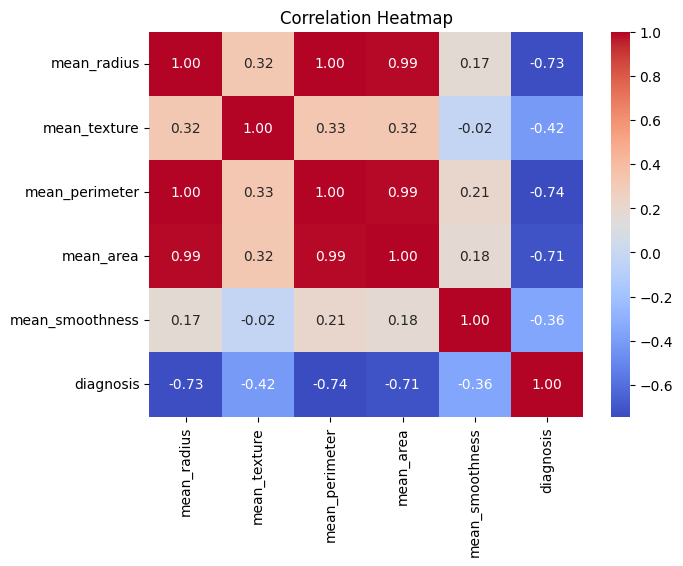

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
if len(X) > 1000:
  exp_data = X.head(1000)
else: exp_data = X

In [17]:
shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(exp_data)
print(f"SHAP values dimernsions : {shap_values.shape}")

feature_names = X_train.columns.tolist()
lime_explainer = LimeTabularExplainer(X_train.values, mode='classification', feature_names=feature_names)

SHAP values dimernsions : (569, 5)


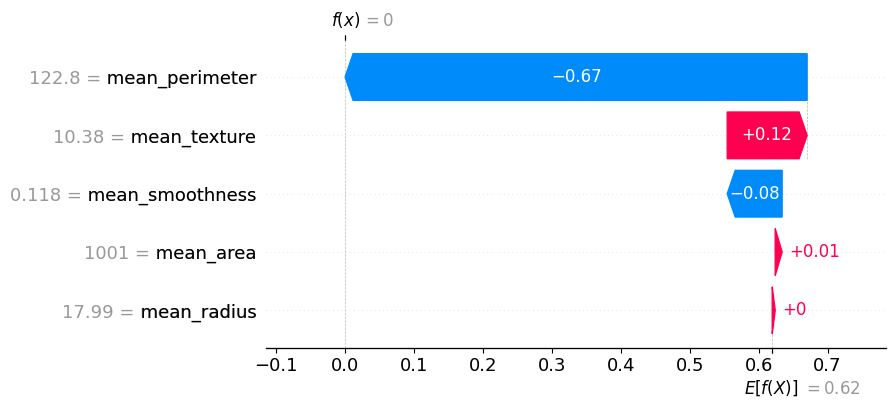

In [18]:
shap.plots.waterfall(shap_values[0])

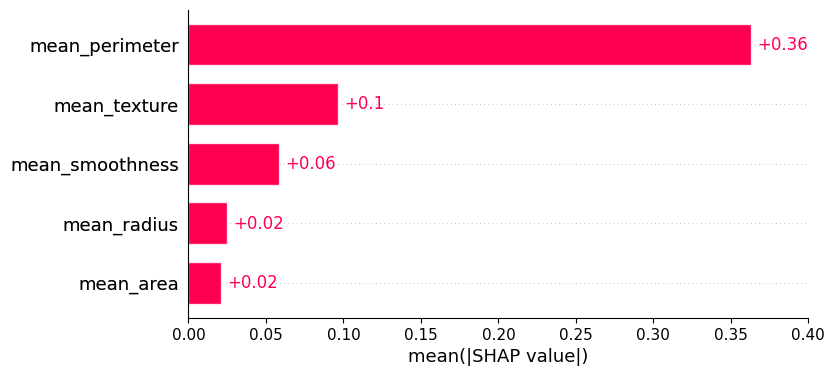

In [19]:
shap.plots.bar(shap_values)

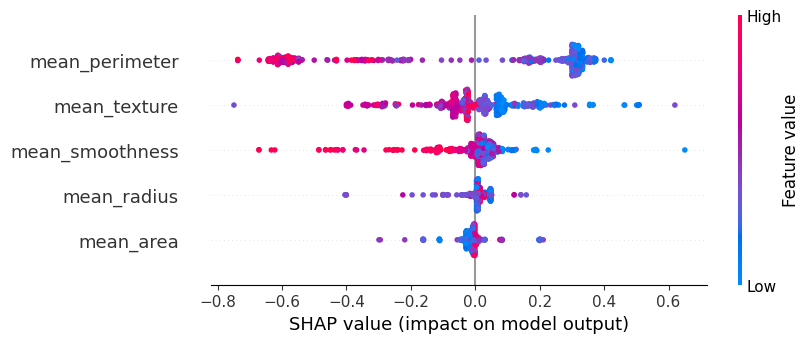

In [20]:
shap.plots.beeswarm(shap_values)

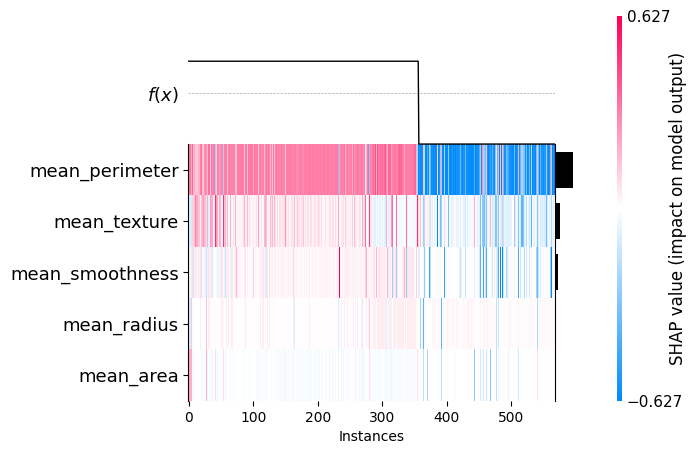

In [21]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

In [22]:
explanation = lime_explainer.explain_instance(X_test.iloc[1], model.predict)
explanation.as_pyplot_figure()
plt.title(f'Feature Importance : Instance: {1}')
plt.tight_layout()
plt.show()

print()

df = pd.DataFrame(explanation.as_list(), columns=['Feature', 'Weight'])
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)
print(shap_values.shape)

(569, 5)


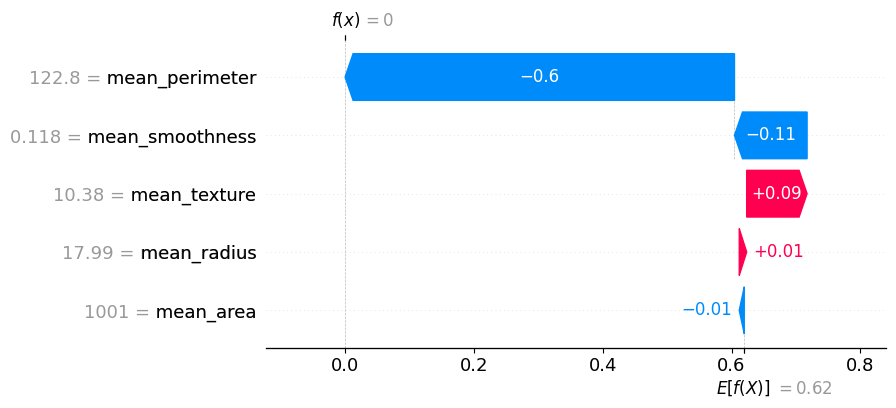

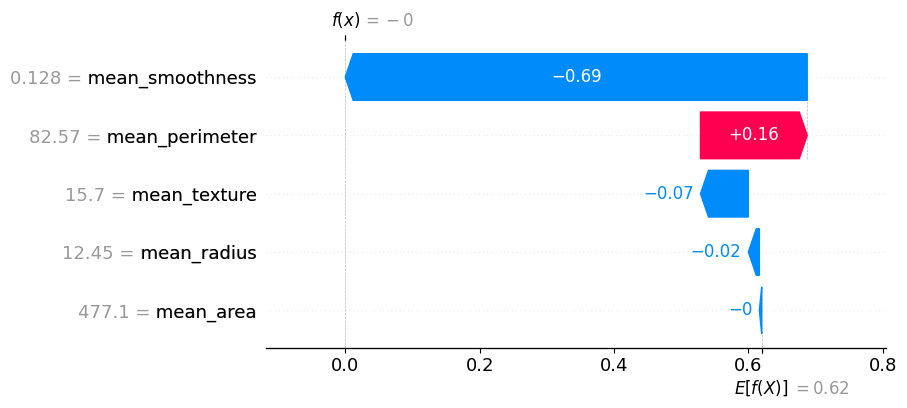

In [ ]:
shap.plots.waterfall(shap_values[0])
print()
shap.plots.waterfall(shap_values[5])

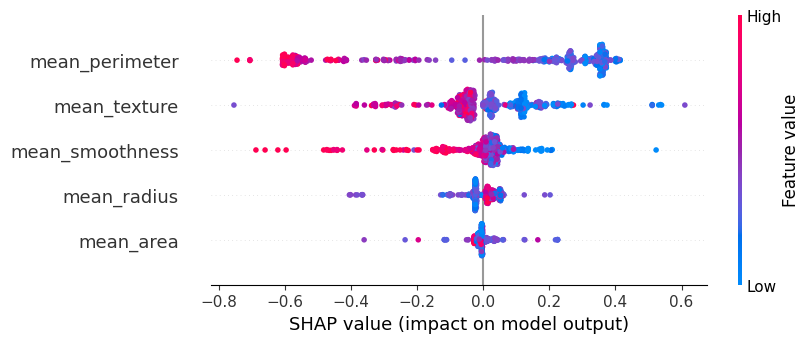

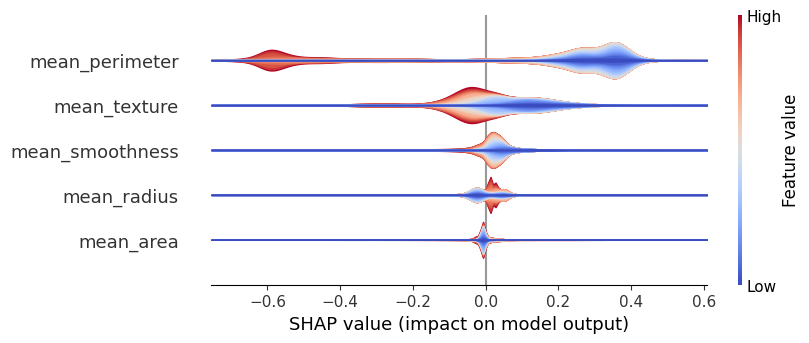

In [ ]:
shap.plots.beeswarm(shap_values)
print()
shap.plots.violin(shap_values, plot_type="layered_violin")

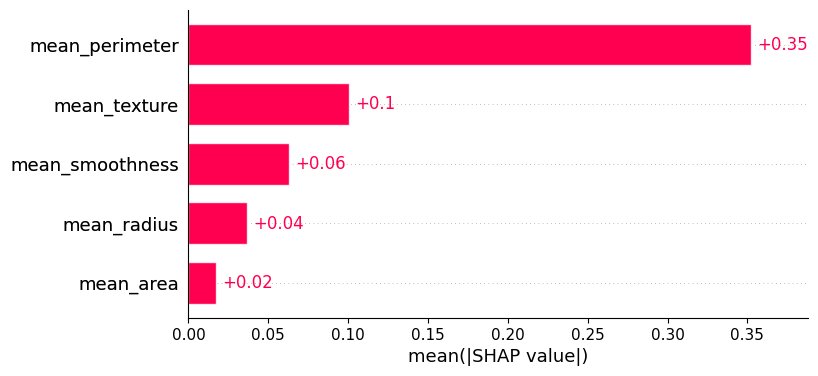

In [ ]:
shap.plots.bar(shap_values)

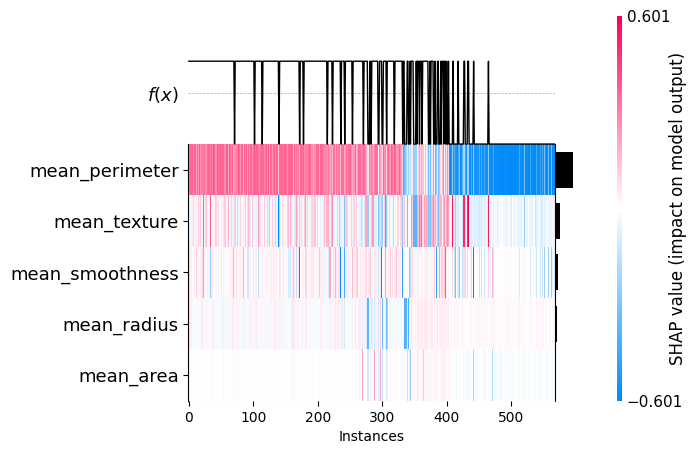

In [ ]:
# order = np.argsort(data['mean_perimeter'])
# shap.plots.heatmap(shap_values, instance_order=order)
shap.plots.heatmap(shap_values, feature_values=shap_values.abs.max(0))

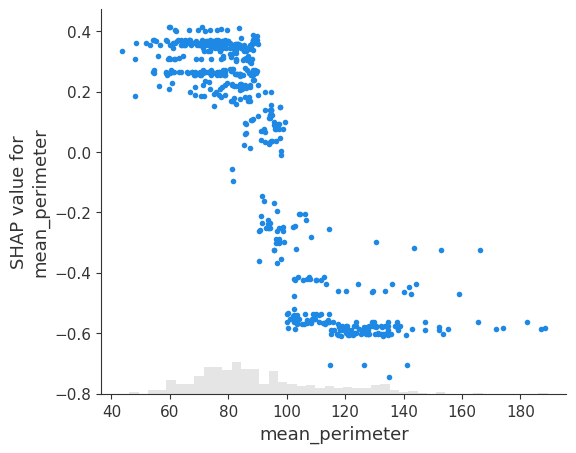

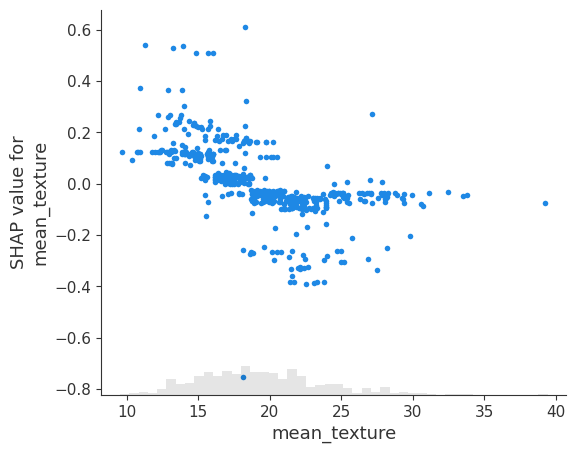

In [ ]:
shap.plots.scatter(shap_values[:,"mean_perimeter"])
print()
shap.plots.scatter(shap_values[:,"mean_texture"])